In [ ]:
library(tidyverse)
library(repr)
theme_set(theme_minimal())
options(repr.plot.width = 10, repr.plot.height = 8)

## Introduction 

We have all heard the expression of a "one-hit wonder,” but what is it exactly? Wikipedia sums it up perfectly: "[A] "one-hit wonder" is any entity that achieves mainstream popularity, often for only one piece of work, and becomes known among the general public solely for that momentary success.” Our research regards, examines and presents some of the biggest "one-hit wonders" over the last few decades. For the purposes of this experiment, we have declared an artist a one-hit wonder based upon the number of their Spotify streams.

## Methodology 

We collected data from Spotify via the Spotify API for 20 famous artists who could most likely be considered as “one-hit wonders.” The collected data includes the five most streamed songs of each artist, the number of Spotify streams of each song, and the date and the audio features of the two most streamed songs of each artist. The audio features include different characteristics, such as: "dance-ability," loudness, or tempo. This research will be presented via various sections which aim to enlighten certain aspects of these artists and their songs.
The first section is intending to show that these artists are, indeed, "one-hit wonders."

## Data Analysis

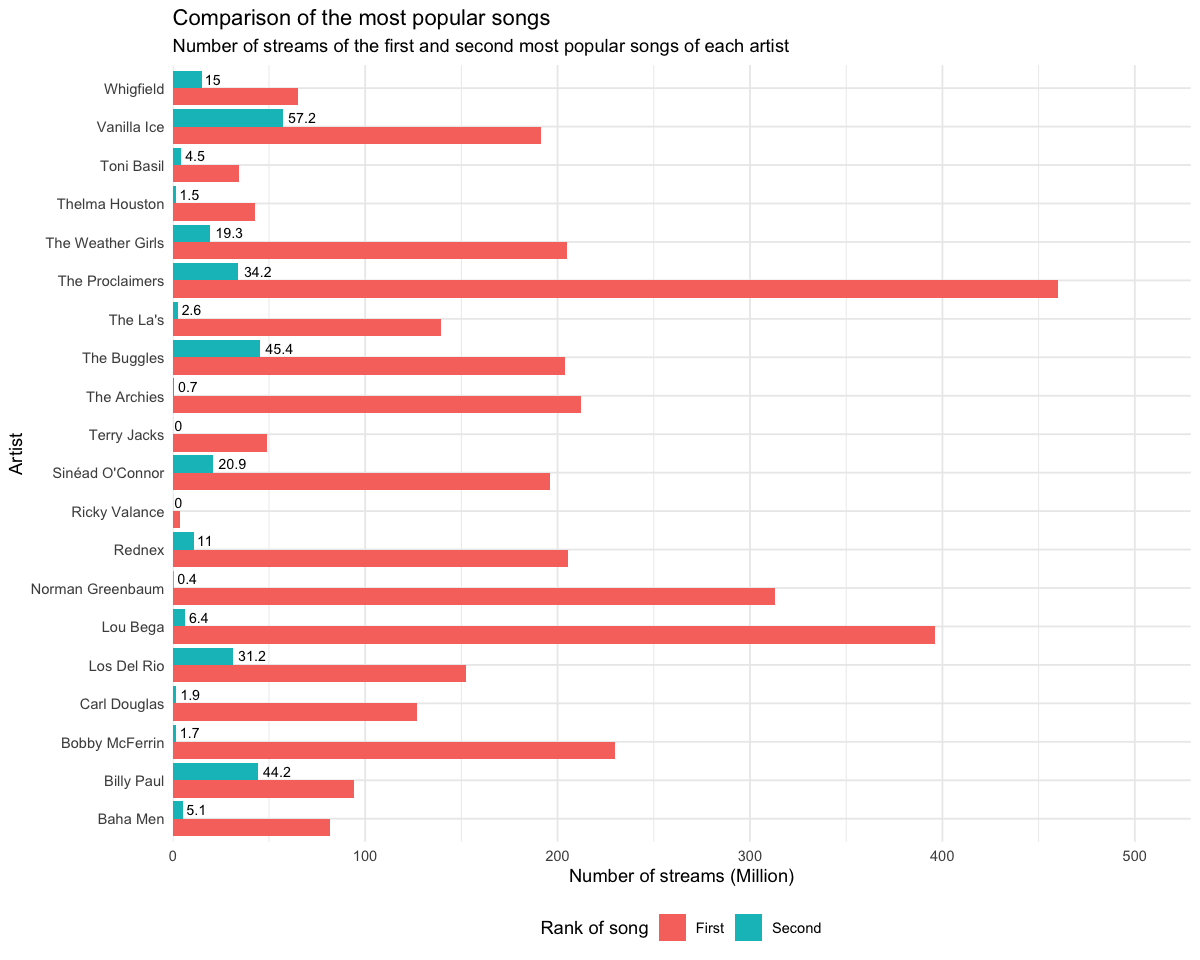

In [19]:
top_two_songs <- read_csv("data/Stream_count_data.csv",
                          show_col_types = FALSE) |>
    filter(rank <= 2) |>
    mutate(rank = case_when(
        rank == 1 ~ "First",
        rank == 2 ~ "Second"
    )) |>
    mutate(playcount_mils = playcount / 10^6)

ggplot(top_two_songs, aes(x = playcount_mils, y = artist)) +
    geom_col(aes(fill = rank), position = "dodge") +
    geom_text(
        data = filter(top_two_songs, rank == "Second"),
        aes(y = artist, x = playcount_mils, label = round(playcount_mils, 1)),
        hjust = -0.2, size = 3, vjust = -0.4
    ) +
    labs(
        title = "Comparison of the most popular songs",
        subtitle = "Number of streams of the first and second most popular songs of each artist",
        x = "Number of streams (Million)",
        y = "Artist",
        fill = "Rank of song"
    ) +
    theme(legend.position = "bottom") +
    scale_x_continuous(expand = expansion(mul = c(0, 0.15)))

As displayed above, the plot compares the number of Spotify streams of the first and second most popular songs of 10 of the selected artists. Huge differences can be seen for each occasion as none of these artist have ever come close to the success of their biggest hit.

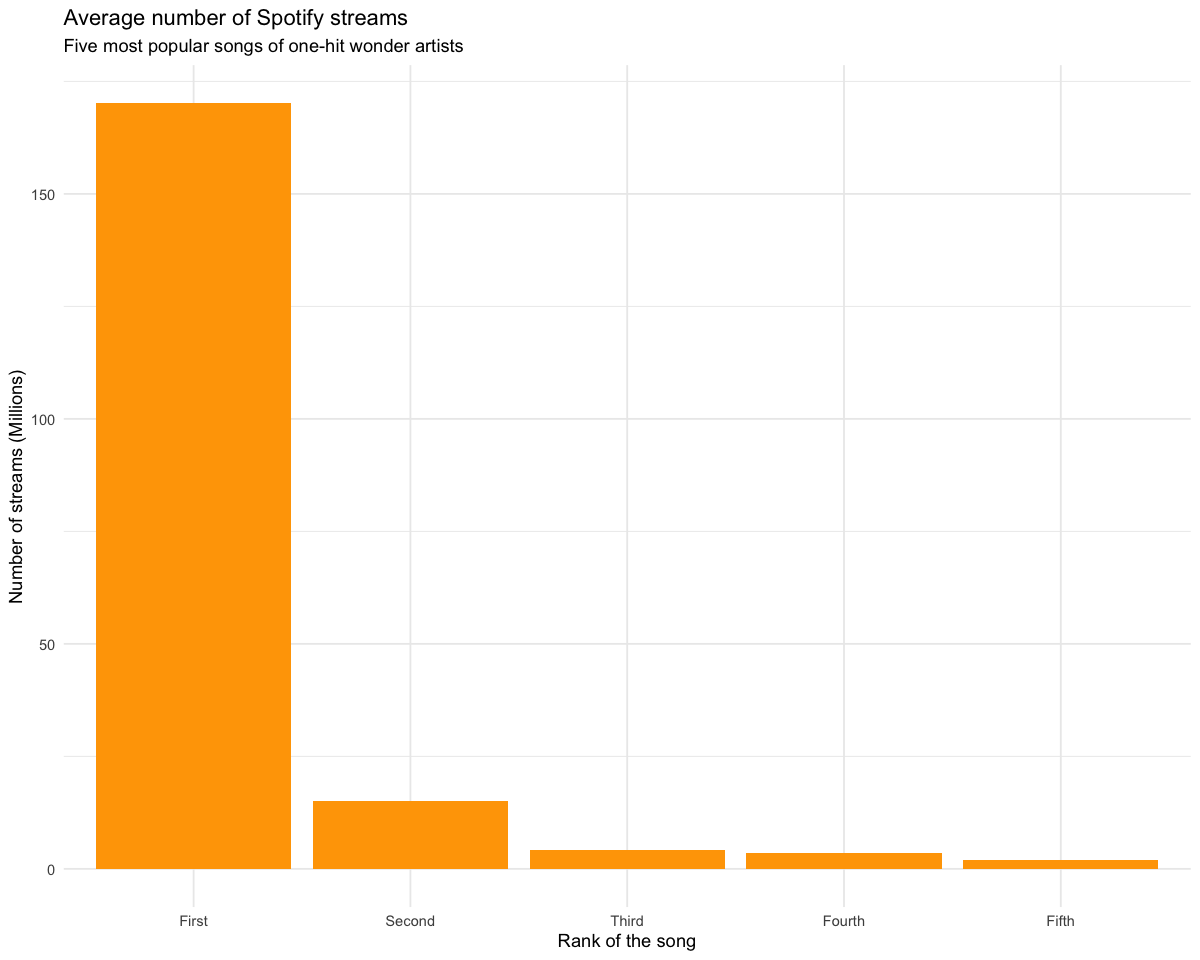

In [29]:
streams<-read_csv("data/Stream_count_data.csv", show_col_types = FALSE) |>
    group_by(rank) |>
    summarize(average_stream=mean(playcount)) |>
    mutate(
        rank = case_when(
            rank == 1 ~ "First",
            rank == 2 ~ "Second",
            rank == 3 ~ "Third",
            rank == 4 ~ "Fourth",
            rank == 5 ~ "Fifth"
        ),
        rank = factor(rank, levels = c("First", "Second", "Third", "Fourth", "Fifth"))
    )

ggplot(streams)+
    geom_bar(aes(x=rank,y=average_stream/10^6),stat='identity',fill='orange')+
    labs(
        x='Rank of the song',
        y='Number of streams (Millions)',
        title='Average number of Spotify streams',
        subtitle='Five most popular songs of one-hit wonder artists'
    ) +
    theme_minimal()

Next, we ranked the five most popular songs of every artist, and then averaged the number of Spotify streams of each rank (which is shown in the next plot). The first ranked songs averaged close to 200 million streams while the second ranked songs stayed below 25 million. 3rd to the 5th ranked songs lag far behind this number. This plot further reinforces that these artist had only one outstanding performance over their career.

We tried to investigate whether there is a difference in the number of "one-hit wonder" artists over the decades, particularly between 1969 and 2000 - the date of the oldest and newest "one-hit wonders" in our research.

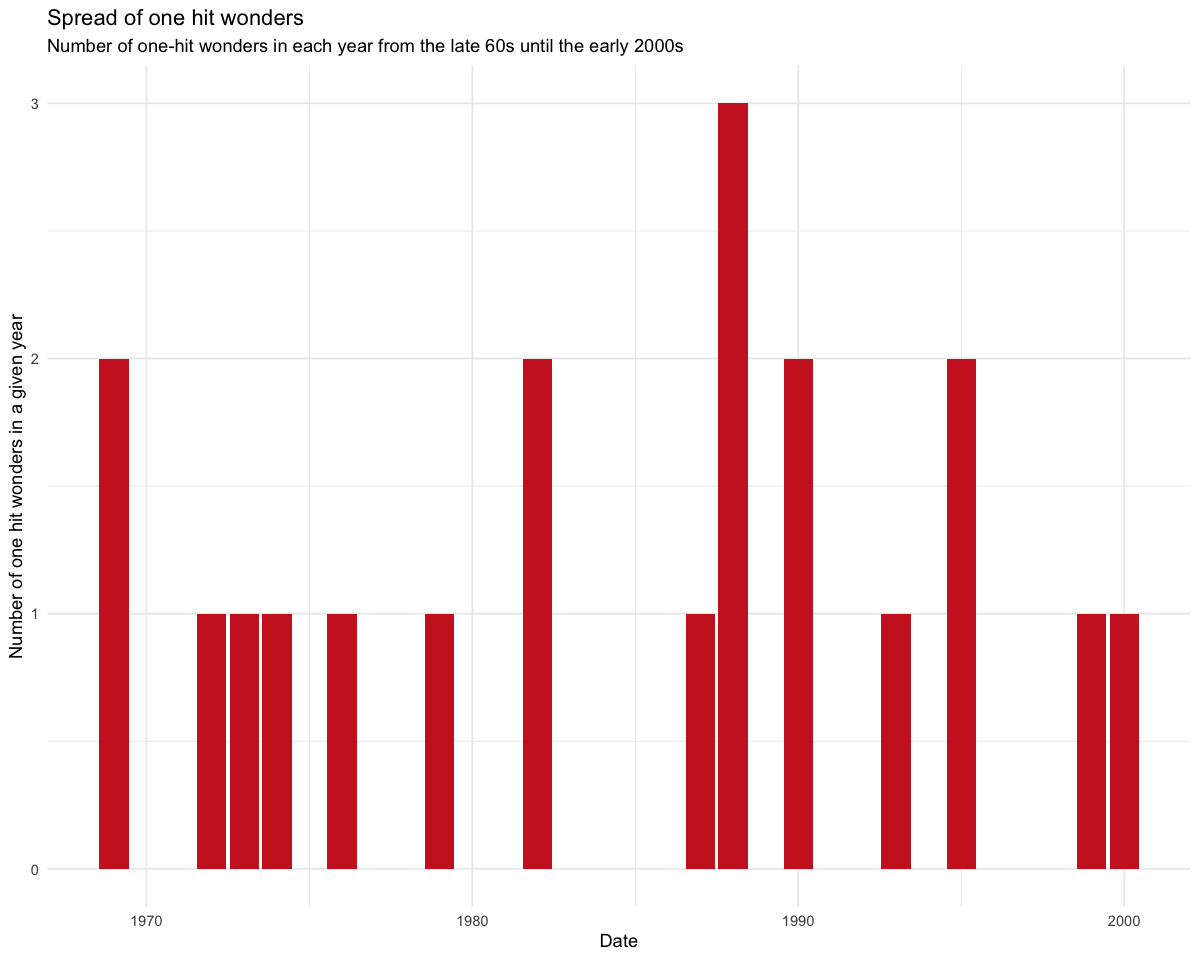

In [21]:
years<-read_csv("data/Year_released_data.csv", show_col_types = FALSE)
years<-rename(years, "Date"="One hit wonder: year released")
ggplot(years,aes(Date))+
geom_bar(fill='firebrick3')+
theme_minimal()+
labs(x='Date',y="Number of one hit wonders in a given year", title='Spread of one hit wonders',subtitle="Number of one-hit wonders in each year from the late 60s until the early 2000s")

We can see that there is not a strong correlation regarding the distribution of such artists over time. While the relatively small number of data can also have an effect upon this result, the obvious explanation is that the prevalence of "one-hit wonders" does not depend on the era as there were, and will always be, such performers.

We may have the assumption that "one-hit wonder" artists generally release their biggest hit early in their career and then they try to recreate it, typically without success. Hence, we checked whether the second most popular songs usually came later than the most popular songs or not.

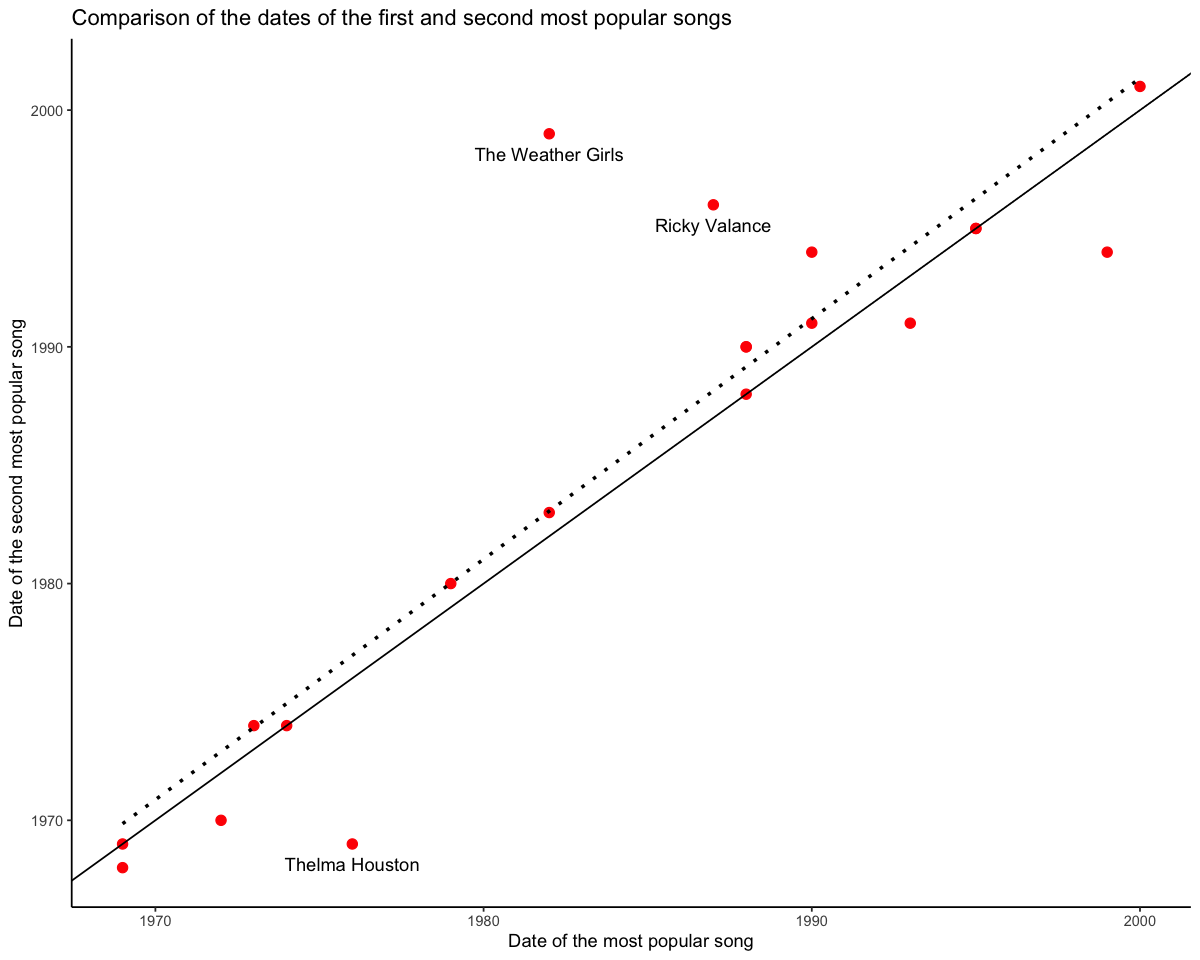

In [42]:
  final2<-read_csv("data/Year_released_data.csv", show_col_types = FALSE) |>
    rename(
      First = "One hit wonder: year released",
      Second = "2nd most popular song: year released"
    ) |>
    mutate(Artist = str_extract(
      `One hit wonder song + Artist`,
      "(?<=– ).*"
    ))
  ggplot(final2, aes(x=First, y=Second))+
  geom_point(shape=20,size=4,colour='red')+
  geom_abline(slope=1,intercept=0)+
  geom_smooth(method="lm", se=FALSE, col="black",linetype=3, formula = y ~ x)+
  labs(x='Date of the most popular song',y='Date of the second most popular song',title='Comparison of the dates of the first and second most popular songs')+
  theme_classic()+
  geom_text(aes(label=ifelse(First-Second>5 | Second-First>5,as.character(Artist),''),hjust=0.5,vjust=2))

The plot above lightly supports this claim. The straight line is a y=x line, where y and x are the date of the second most and the most popular songs respectively. We can see that more points are above the line than below, which means that the big hits were most likely to be followed by the second biggest hit rather than vice versa. After we fitted a linear model, we can see that the representative plot line is above the straight line, so the general trend is what we expected.

We investigated the audio features of the songs to figure out why the famous songs became famous and, alteratively, why the other songs of the particular artist didn’t. We compared the audio features of the two most popular songs of each artist, expecting that one feature, i.e.: "dance-ability" will be generally higher for the most popular one than the second most popular one. Surprisingly, we rarely found such patterns.

In [56]:
audio1 <- read_csv("data/Audio_features_for_ohw.csv", show_col_types = FALSE)
audio2 <- read_csv("data/Audio_features_for_2nd_popular_songs.csv", show_col_types = FALSE) |>
    rename_all(~str_c(., "2"))

audio <- bind_cols(audio1, audio2)
audio$Artist <- final2$Artist

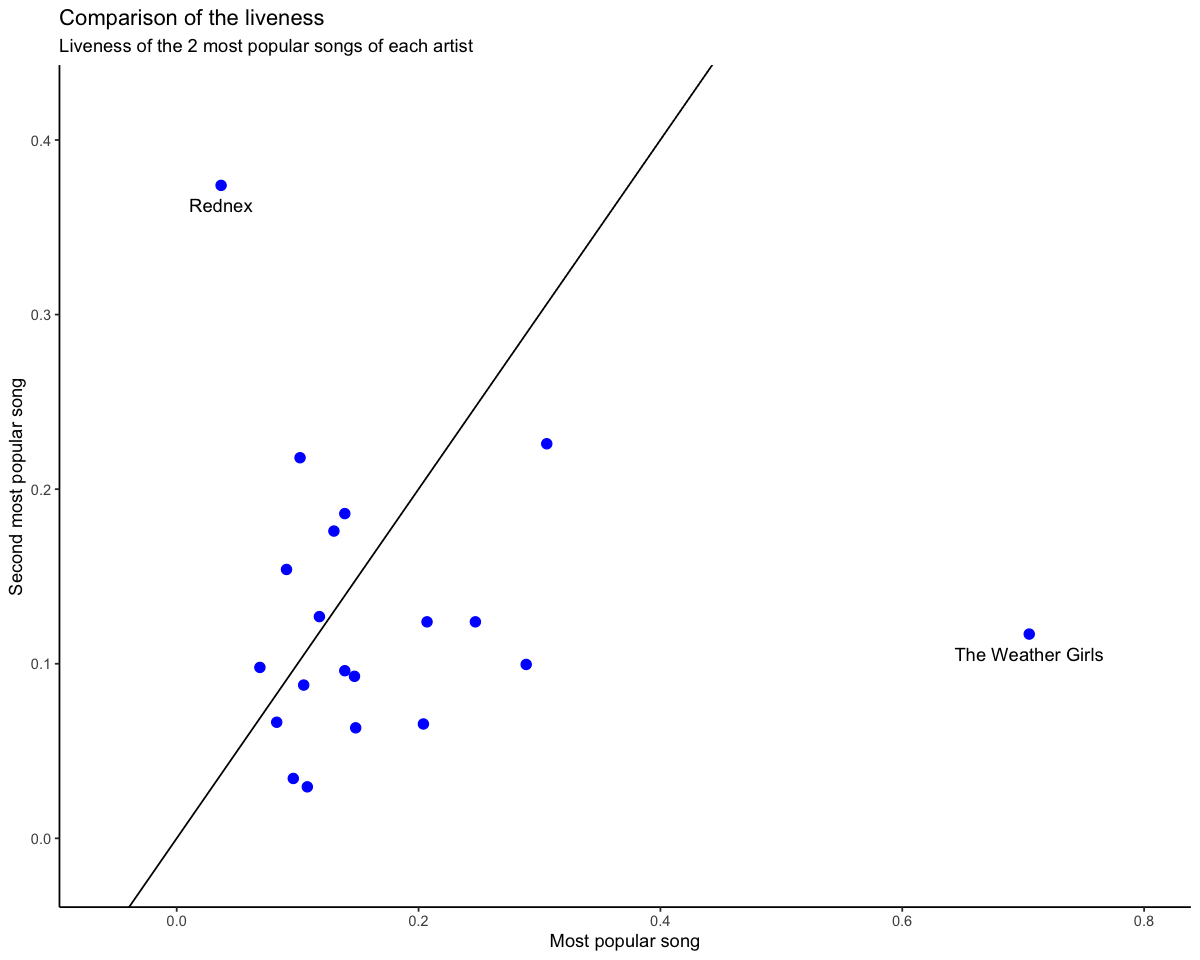

In [58]:
ggplot(audio, aes(x=liveness, y=liveness2))+
geom_point(shape=20,size=4,colour='blue')+
geom_abline(slope=1,intercept=0)+
labs(x='Most popular song',y='Second most popular song', title='Comparison of the liveness', subtitle='Liveness of the 2 most popular songs of each artist')+
theme_classic()+
geom_text(aes(label=ifelse(liveness>liveness2+0.2 | liveness2>liveness+0.2, as.character(Artist),''),hjust=0.5,vjust=2))+
scale_x_continuous(expand = expansion(mul = c(0.2, 0.2))) +
scale_y_continuous(expand = expansion(mul = c(0.2, 0.2)))

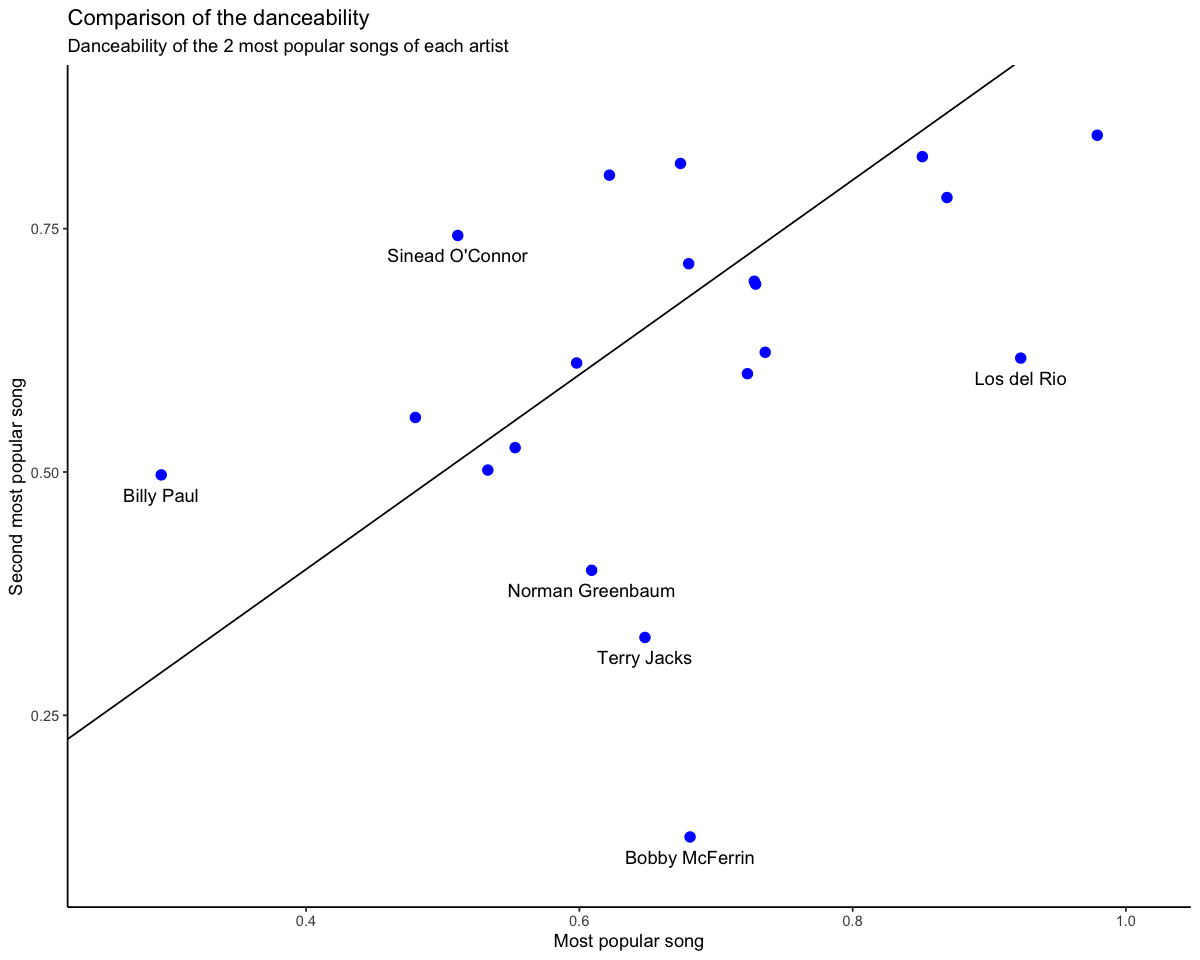

In [59]:
ggplot(audio, aes(x=danceability, y=danceability2))+
geom_point(shape=20,size=4,colour='blue')+
geom_abline(slope=1,intercept=0)+
labs(x='Most popular song',y='Second most popular song', title='Comparison of the danceability', subtitle='Danceability of the 2 most popular songs of each artist')+
theme_classic()+
geom_text(aes(label=ifelse(danceability>danceability2+0.2 | danceability2>danceability+0.2, as.character(Artist),''),hjust=0.5,vjust=2))+
scale_x_continuous(expand = expansion(mul = c(0.1, 0.1))) +
scale_y_continuous(expand = expansion(mul = c(0.1, 0.1)))

The closest we got to this hypothesis were in regards to the "liveness" and the "dance-ability" of the songs, of which the most popular ones increasingly had higher scores than the second most popular ones, as seen above. However, the trend is not so strong here, and pure luck could have had an effect. So, it seems that none of the audio features explain the reason behind their success.

Finally, we examined the extent to which each "one-hit wonder" artist technically is a "one-hit wonder," which was a value we got by dividing the Spotify stream count of the most popular songs by the stream count of the second most popular songs from each artist.

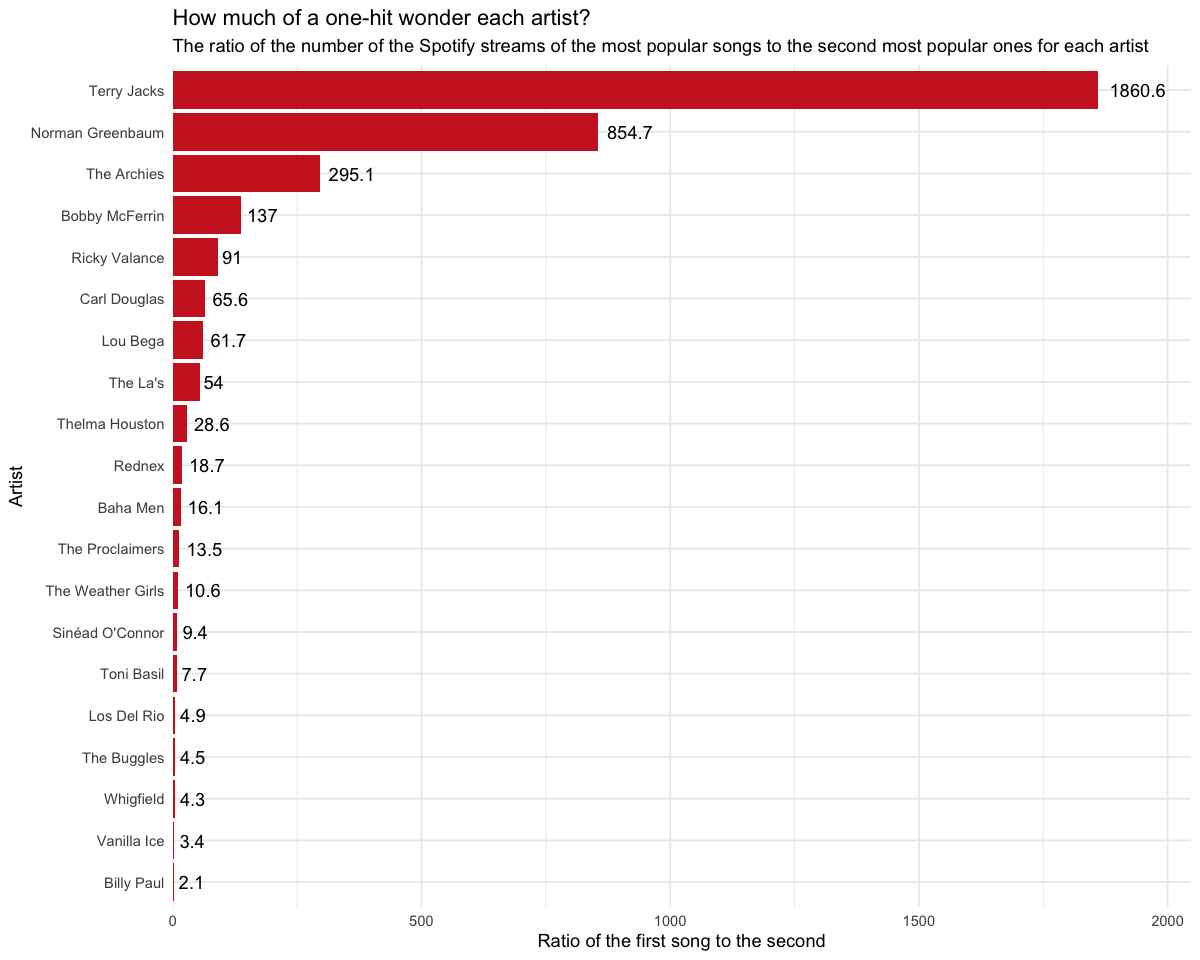

In [66]:
streams<-read_csv("data/Stream_count_data.csv", show_col_types = FALSE) |>
    filter(rank <= 2) |>
    mutate(rank = case_when(
        rank == 1 ~ "First",
        rank == 2 ~ "Second"
    ))
streams<-filter(streams,rank=="First"| rank=="Second")
streams<-spread(streams,key=rank,value=playcount)
streams<-select(streams,-name)
streams<-inner_join(streams,streams,by='artist')
streams<-filter(streams, !(is.na(Second.x)&is.na(Second.y)))
streams<-filter(streams, !(is.na(First.x)&is.na(First.y)))
streams<-filter(streams, !(is.na(First.x)))
streams<-rename(streams, First=First.x,Second=Second.y)%>%
mutate(Rate=First/Second)
streams$artist <- fct_reorder(streams$artist, streams$Rate)
ggplot(streams,aes(x=Rate, y=artist))+
geom_col(fill="firebrick3")+
theme_minimal()+
labs(x="Ratio of the first song to the second",y="Artist", title="How much of a one-hit wonder each artist?",subtitle="The ratio of the number of the Spotify streams of the most popular songs to the second most popular ones for each artist") +
geom_text(aes(label=round(Rate,digits=1),hjust=-0.2)) +
scale_x_continuous(expand = expansion(mul = c(0, 0.1)))

As we can see, Norman Greenbaum is a real "one-hit wonder," with a stream count more than 850 times higher for his biggest hit than for his second biggest hit. On the other hand, Billy Paul or Vanilla Ice had other songs which were relatively popular.

## Conclusions

We hope that our project demonstrated some interesting characteristics of 20 of the most famous "one-hit wonder" artists. While most of these artists are not currently active, some of them are, and they may produce another hit and then successfully erase the title “one-hit wonder” from themselves, hence resign their place from our list.